In [22]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [23]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Letter\Letter_AW_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,2.0,4.0,4.0,3.0,2,7,8,2,9,11,7.0,7,1.0,8.0,5.0,6,NaN
1,4.0,7.0,5.0,5.0,5,5,9,6,4,8,7.0,9,2.0,9.0,7.0,10,NaN
2,NaN,NaN,NaN,NaN,4,8,8,5,10,11,NaN,8,NaN,NaN,NaN,10,NaN
3,NaN,NaN,NaN,NaN,4,7,7,13,1,7,NaN,8,NaN,NaN,NaN,8,NaN
4,6.0,7.0,8.0,5.0,4,7,6,3,7,10,7.0,9,3.0,8.0,3.0,7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5.0,10.0,5.0,8.0,3,4,10,7,8,12,10.0,9,2.0,9.0,2.0,6,NaN
19996,4.0,7.0,6.0,5.0,3,7,8,2,10,12,6.0,8,1.0,9.0,6.0,8,NaN
19997,4.0,8.0,4.0,6.0,4,7,8,7,4,10,7.0,6,3.0,9.0,3.0,7,NaN
19998,4.0,11.0,4.0,8.0,3,0,2,4,6,1,0.0,7,0.0,8.0,0.0,8,NaN


In [24]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	4000
float64		column 2	4000
float64		column 3	4000
float64		column 4	4000
int64		column 5	0
int64		column 6	0
int64		column 7	0
int64		column 8	0
int64		column 9	0
int64		column 10	0
float64		column 11	4000
int64		column 12	0
float64		column 13	4000
float64		column 14	4000
float64		column 15	4000
int64		column 16	0
float64		column 17	20000


In [25]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
count,16000.000000,16000.000000,16000.000000,16000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,16000.00000,20000.000000,16000.000000,16000.000000,16000.000000,20000.00000,0.0
mean,4.011188,7.002313,5.114875,5.345750,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.49125,7.929000,3.060875,8.348437,3.701500,7.80120,NaN
std,1.896454,3.283117,1.984767,2.248143,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.58241,2.080619,2.312575,1.539781,2.555569,1.61747,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,NaN
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,2.000000,8.000000,2.000000,7.00000,NaN
50%,4.000000,7.000000,5.000000,6.000000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000,NaN
75%,5.000000,9.000000,6.000000,7.000000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000,NaN
max,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000,NaN


<AxesSubplot:>

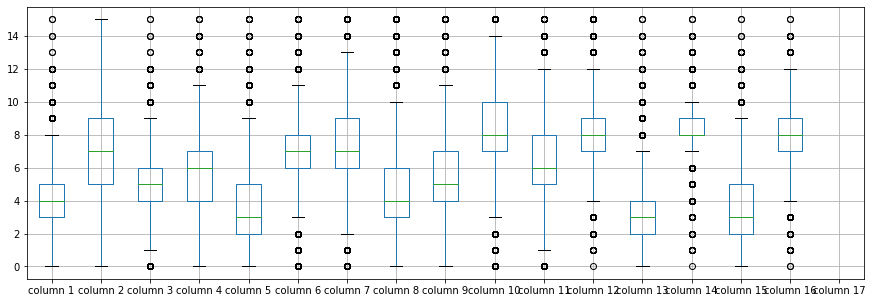

In [26]:
df.boxplot(return_type='axes', figsize=(15,5))

In [27]:
df.mean()

column 1     4.011188
column 2     7.002313
column 3     5.114875
column 4     5.345750
column 5     3.505850
column 6     6.897600
column 7     7.500450
column 8     4.628600
column 9     5.178650
column 10    8.282050
column 11    6.491250
column 12    7.929000
column 13    3.060875
column 14    8.348437
column 15    3.701500
column 16    7.801200
column 17         NaN
dtype: float64

In [28]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
column 1,1.000000,0.756082,0.848588,0.670531,0.611421,-0.041045,0.043191,0.006629,0.028173,0.134688,0.031461,-0.052460,0.485460,0.100294,0.254637,-0.126241,NaN
column 2,0.756082,1.000000,0.672467,0.822046,0.552289,0.037131,-0.039864,-0.039309,0.069183,0.152248,-0.058566,-0.019624,0.273173,0.002759,0.213007,-0.062092,NaN
column 3,0.848588,0.672467,1.000000,0.658337,0.760877,0.050554,0.021920,-0.109501,0.044244,0.101161,0.007928,-0.046791,0.552210,0.045211,0.242213,-0.142445,NaN
column 4,0.670531,0.822046,0.658337,1.000000,0.641750,0.036922,-0.017173,0.067650,0.027717,0.006504,-0.013615,0.015745,0.265852,0.027345,0.283634,-0.041006,NaN
column 5,0.611421,0.552289,0.760877,0.641750,1.000000,0.139159,-0.028822,-0.011985,-0.065557,-0.069776,-0.081809,-0.038858,0.625024,0.010433,0.481870,-0.062969,NaN
column 6,-0.041045,0.037131,0.050554,0.036922,0.139159,1.000000,-0.356580,-0.053306,-0.122851,0.085963,-0.366191,-0.032115,0.140549,-0.255780,0.125642,0.248816,NaN
column 7,0.043191,-0.039864,0.021920,-0.017173,-0.028822,-0.356580,1.000000,-0.118625,-0.049658,0.178318,0.586971,-0.271649,-0.059920,0.553971,-0.100636,-0.207900,NaN
column 8,0.006629,-0.039309,-0.109501,0.067650,-0.011985,-0.053306,-0.118625,1.000000,-0.188431,-0.317780,0.041232,0.082020,0.153541,-0.080737,-0.000594,0.182902,NaN
column 9,0.028173,0.069183,0.044244,0.027717,-0.065557,-0.122851,-0.049658,-0.188431,1.000000,0.132000,-0.058852,0.119048,-0.390054,-0.055083,0.259296,-0.061335,NaN
column 10,0.134688,0.152248,0.101161,0.006504,-0.069776,0.085963,0.178318,-0.317780,0.132000,1.000000,0.033770,-0.106759,-0.201171,0.030680,-0.110287,-0.114223,NaN


In [29]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [ ]:
imputer = md.Midas(layer_structure = [17,17+20,17+20+20,17+20+20+20,17+20+20,17+20,17], vae_layer = False, seed = 200)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [17]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 67.08703009643554
Epoch: 1 , loss: 44.78509313659668
Epoch: 2 , loss: 41.39727439575195
Epoch: 3 , loss: 39.95267283325195
Epoch: 4 , loss: 38.954439179992676
Epoch: 5 , loss: 38.62696369781494
Epoch: 6 , loss: 38.44564222259522


In [ ]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

In [ ]:
new_df=imputations[-1]
new_df.iloc[21,:]


In [ ]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Letter.xlsx', header=None,names=column_names)

In [ ]:
new_df-complete_df

Calculating NRMSE Value

In [ ]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [ ]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [ ]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

In [ ]:
denominator=Frobenius_norm(complete_df)
denominator

In [ ]:
NRMS=numerator/denominator
NRMS


In [ ]:
new_df.iloc[66,:]

In [ ]:
imputations[-1]


In [ ]:
imputations[-1].to_excel("Letter_AW_20(imp).xlsx", index=False, header=False)